# Pandas 3
### Jane Slagle
### Vol 3 Lab
### 9/12/22

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [2]:
def prob1():
    """
    Use groupby objects to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    For each column return the values of the describe function
    for the type of university with the higher mean.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    colleges = pd.read_csv("college.csv") #read in data from college.csv file

    #use groupby object to group colleges by private, public universities:
    #Private column in dataset: has 2 groups w/in it: says Yes in column if private, No if public
    college_type = colleges.groupby("Private") #access the Private column only
    private = college_type.get_group("Yes")    #get private group of colleges
    public = college_type.get_group("No")      #get public group of collleges 
    
    
    #want determine whether private or public have higher mean for S.F.Ratio column, so print out mean for each:
    print("S.F.Ratio: ")
    print(private["S.F.Ratio"].mean())
    print(public["S.F.Ratio"].mean())  
    print("")
    ans_1 = public["S.F.Ratio"].describe().values #find that public has higheer mean so want return public column as array
                                                  #.describe() tells us everything about S.F.Ratio column in public group, .values makes it array
    
    #want see which group has higher Top10Perc column mean
    print("Top10perc: ")
    print(private["Top10perc"].mean())
    print(public["Top10perc"].mean())    
    print("")
    ans_2 = private["Top10perc"].describe().values #find that private has higher mean
    
    #want see which group has higher Top25Perc column mean
    print("Top25perc:")
    print(private["Top25perc"].mean())
    print(public["Top25perc"].mean())
    print("")
    ans_3 = private["Top25perc"].describe().values #find that private has higher mean
    
    return (ans_1, ans_2, ans_3)
    

In [3]:
prob1()

S.F.Ratio: 
12.945486725663716
17.139150943396228

Top10perc: 
29.330973451327434
22.83490566037736

Top25perc:
56.9575221238938
52.70283018867924



(array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]),
 array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]))

# Problem 2

In [4]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    #first get the 2 groups of private, public universities from dataset so that can plot to compare them:
    colleges = pd.read_csv("college.csv") 

    college_type = colleges.groupby("Private") #get the public, private groups  
    
    #want graph to compare # applicants, accepted students, enrolled students in public vs private universities
    #so make a bargraph so that able to compare all 3 categories for the 2 groups at once
    #use college_type to make graph bc then it will be split into the 2 groups like how we want
    college_type[["Apps", "Accept", "Enroll"]].mean().plot(kind="barh", xerr=college_type.std(), title = "Num of Applicants, Accepted and Enrolled Students in Private vs Public Universities")
    plt.xlabel("Number of students in each cateogory")
    
    #need graph to compare how range of money spent on room, board compares btw private, public universities:
    colleges.boxplot(["Room.Board"], by="Private", grid = False) #plot column Room.Board and plot by Private Column to plot if public, private
    plt.ylabel("Money Cost")
    plt.title("Range of Money Spent on Room & Board in Private vs Public Universities")
    
    plt.tight_layout()
    

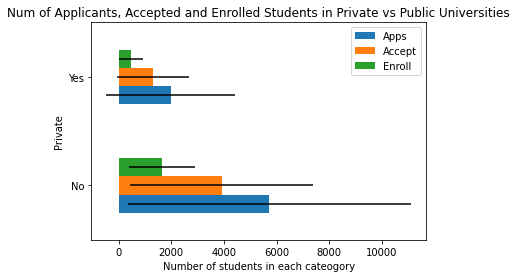

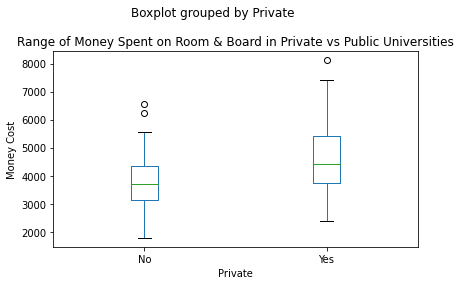

In [5]:
prob2()

# Problem 3

In [6]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination makes the most money in total?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week per person?
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    workers = pd.read_csv("Ohio_1999.csv") #file gives data on workers in Ohio in year 1999

    #in general: pivot tables average the values to get entry see in the table (give the mean)
    
    #want pivot table for which race/sex combo has highest usual weekly earnings IN TOTAL
    #since want total will have aggfunc variable be sum so that are getting the sum for each
    print(workers.pivot_table(values = "Usual Weekly Earnings", index = "Race", columns = "Sex", aggfunc = "sum"))
    ans_1 = (1, 1)
    
    #get lowest cumulative usual hours worked so sum again
    print(workers.pivot_table(values = "Usual Hours Worked", index = "Race", columns = "Sex", aggfunc = "sum"))
    ans_2 = (3, 2)
    
    #want highest average usual hours worked so don't specify aggfunc variable so that can get mean
    print(workers.pivot_table(values = "Usual Hours Worked", index = "Race", columns = "Sex"))
    ans_3 = (3,1)
    
    return (ans_1, ans_2, ans_3)


In [7]:
prob3()

Sex        1      2
Race               
1     145789  85867
2      10768   6004
3          0      0
4       5103   2553
Sex       1      2
Race              
1     36939  23335
2      2382   2584
3       146     40
4       580    365
Sex           1          2
Race                      
1     43.254098  40.512153
2     40.372881  38.000000
3     48.666667  40.000000
4     38.666667  40.555556


((1, 1), (3, 2), (3, 1))

# Problem 4

In [8]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which age group works the most hours on average?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    workers = pd.read_csv("Ohio_1999.csv")
    
    #answer question 1: what is most common degree among workers
    #use pd.cut to specify the 3 cateogries we want to look at: want [0,39), [39,42], [43, 46] as intervals
    degree = pd.cut(workers["Educational Attainment"], [0, 38, 42, 46]) 
    ans_1 = degree.value_counts().idxmax() #count num of entries in each group to get highest degree type have
                                           #use .idxmax() to get the most common degree that get from counting
    
    #answer question 2: want interval w/ highest avg Usual Hours Worked (don't need specify aggfunc bc already has the mean)
    ages = pd.qcut(workers["Age"], 6) #parition Age column into 6 equally sized intervals
    table = workers.pivot_table(values = "Usual Hours Worked", columns = [ages]) #don't need index here bc only need ages, don't need anything else
    ans_2 = table.sum(axis=0).idxmax() #get index of interval w/ highest avg
    
    #answer question 3: what age/degree combo has lowest yearly salary on average (avg is default)
    pivoting = workers.pivot_table(values = "Yearly Salary", index = degree
                                   , columns = [ages]) #get index, columns from parts 1, 2
    ans_3 = pivoting.idxmin(axis = 0).idxmin(), pivoting.idxmin(axis = 1).idxmin() #have idxmin 2x bc 1st min gives the table and then 2nd min gives the actual value
    
    return ans_1, ans_2, ans_3

In [9]:
prob4()

(Interval(38, 42, closed='right'),
 Interval(40.0, 46.0, closed='right'),
 (Interval(15.999, 29.0, closed='right'), Interval(0, 38, closed='right')))

# Problem 5

In [10]:
def prob5():
    """
    Use pivot tables and groupby objects on the data in
    College.csv to answer the following questions:
        1. Is there a correlation between the percent of alumni
           that donate and the amount the school spends per
           student in both private and public universities?
        2. Is the graduation rate partition with the greatest
           number of schools the same for private and public
           universities?
        3. Is there an inverse correlation between acceptance
           rate and having students from the top 10% of their
           high school class?
        4. Why is the average percentage of students admitted
           from the top 10 percent of their high school class
           so high in private universities with very low
           acceptance rates? Use only the data to explain why; 
           do not extrapolate.
    
    Returns:
        ans_1 (bool): answer to question 1
        ans_2 (bool): answer to question 2
        ans_3 (bool): answer to question 3
        ans_4 (str): answer to question 4
    """
    #get the college data:
    colleges = pd.read_csv("college.csv")    
    college_type = colleges.groupby("Private")
    
    private = college_type.get_group("Yes")  
    public = college_type.get_group("No")  
    
    #question 1: make scatter plot to see if correlation btw % alumni that donate, amt school spends/student in BOTH private, public univ
    private.plot(kind = "scatter", x = 'perc.alumni', y = 'Expend', color = "hotpink") #see if correlation for private
    plt.title("% alumni that donate vs. amount school spends per student in private universities")
    public.plot(kind = "scatter", x = 'perc.alumni', y = 'Expend', color = "orangered") #see if correlation for public
    plt.title("% alumni that donate vs. amount school spends per student in public universities")
    
    plt.show()
    plt.tight_layout()
    ans_1 = False #can see from the 2 scatter plots that there is no correlation for BOTH private, public
    
    #question 2: 
    grad_parts = pd.cut(colleges["Grad.Rate"], [0,20,40,60,80,100]) #parition Grad.Rate into 5 evenly spaced intervals: dont use qcut bc one grad rate is over 100%
      
    table = colleges.pivot_table(values = "Unnamed: 0", index = "Private", columns = grad_parts, aggfunc = "count") #count num universities for public, private. have index be unnamed: 0 bc that's the column w/ colleges in it so will count all the colleges
    print(table)
    ans_2 = False #can see from pivot table that the parition w/ greatest num schools is NOT same for public, private
    
    #question 3: want see if correlation again so make another scatter plot
    #get data want plot for private:
    priv_accept_rate = private["Accept"].values / private["Apps"].values #find the acceptance rates 
    priv_top10perc = private["Top10perc"].values
    
    pub_accept_rate = public["Accept"].values / public["Apps"].values
    pub_top10perc = public["Top10perc"].values
    
    plt.scatter(priv_accept_rate, priv_top10perc, color = "gold")
    plt.scatter(pub_accept_rate, pub_top10perc, color = "lightcoral")
    plt.xlabel("acceptance rate")
    plt.ylabel("top 10%")
    plt.show()
    
    ans_3 = True #can see from scatter plot that there actually IS a correlation. booYAH
    
    #question 4:
    ans_4 = "The reason WHY the average percentage of students admitted from the top 10 % of their high school class  is so high in private universities with very low acceptance rates is because the data tells us that the higher the number of applications, the lower the acceptance rate is. The data also tells us that private schools accept a lower number of applications. The data tells us that since private schools accept less students, they will want to enroll better students who are in the top 10% and thus, since they submit less students, they will want to submit students who are better (the top 10 %)"
    
    return (ans_1, ans_2, ans_3, ans_4)

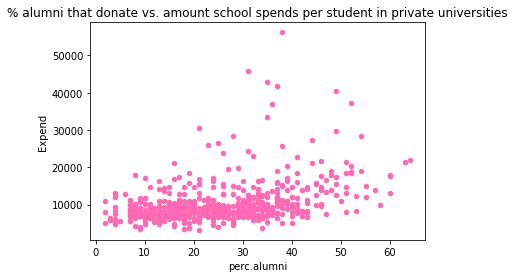

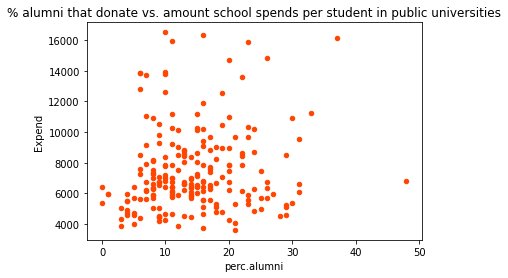

Grad.Rate  (0, 20]  (20, 40]  (40, 60]  (60, 80]  (80, 100]
Private                                                    
No               1        28       107        64         12
Yes              3        25       139       252        145


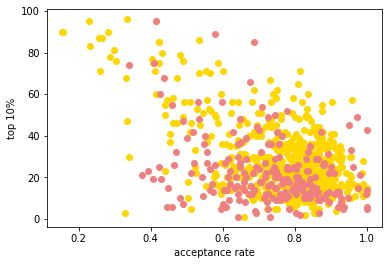

(False,
 False,
 True,
 'The reason WHY the average percentage of students admitted from the top 10 % of their high school class  is so high in private universities with very low acceptance rates is because the data tells us that the higher the number of applications, the lower the acceptance rate is. The data also tells us that private schools accept a lower number of applications. The data tells us that since private schools accept less students, they will want to enroll better students who are in the top 10% and thus, since they submit less students, they will want to submit students who are better (the top 10 %)')

In [11]:
prob5()